In [1122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sn
from scipy import stats
from datetime import datetime
import calendar
from sklearn.cross_validation import cross_val_score
df = pd.read_csv("~/Downloads/train.csv")
df1 = pd.read_csv("~/Downloads/ATM_Info.csv")

IOError: File /home/vikas/Downloads/train.csv does not exist

In [1016]:
data = pd.merge(df,df1,on='ATM_ID')

a=data.groupby(["ATM_ID"])['Withdrawal'].median()
b=data.groupby(["ATM_ID"])['Withdrawal'].std()
id_rem=[]
for i in range(len(a)):
    if b[i]==0:
        id_rem.append(b.index[i])
index=[]
for i in range(len(data)):
    for j in range(len(id_rem)):
        if data.ATM_ID[i]==id_rem[j]:
            index.append(i)
            
data.drop(data.index[index],inplace=True)

#print data.groupby(["ATM_ID"])["Withdrawal"].count()


data.head(2)



,ID,ATM_ID,Date,Withdrawal,Balance,Facility,Type
0,SRNO00279_40544,SRNO00279,1-Jan-11,4831,68464,Only ATM,Rural
1,SRNO00279_40545,SRNO00279,2-Jan-11,11014,57450,Only ATM,Rural


In [1017]:
a=data.groupby(["ATM_ID"])['Withdrawal'].median()
b=data.groupby(["ATM_ID"])['Withdrawal'].std()
columns = ['ATM_ID','med','std']
df2 = pd.DataFrame(data=None,columns=columns)
df2['ATM_ID']=np.asarray(a.index)
df2['med']=np.asarray(a)
df2['std']=np.asarray(b)
data = pd.merge(data,df2,on='ATM_ID')
  

In [1018]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Facility']=le.fit_transform(data.Facility)
data.head(1)


,ID,ATM_ID,Date,Withdrawal,Balance,Facility,Type,med,std
0,SRNO00279_40544,SRNO00279,1-Jan-11,4831,68464,1,Rural,8933.0,6594.251967


In [1019]:
df_type = pd.get_dummies(data.Type)
df_type=df_type.iloc[:,1:2]
df_new = pd.concat([data, df_type], axis=1)
df_new.drop('Type',axis=1,inplace=True)
df_new.head(2)


,ID,ATM_ID,Date,Withdrawal,Balance,Facility,med,std,Rural
0,SRNO00279_40544,SRNO00279,1-Jan-11,4831,68464,1,8933.0,6594.251967,1.0
1,SRNO00279_40545,SRNO00279,2-Jan-11,11014,57450,1,8933.0,6594.251967,1.0


In [1020]:
a=[]
for date in df_new.Date:
    d=date.split('-')
    if d[1]=='Jan':
        b='1'
    if d[1]=='Feb':
        b='2'
    if d[1]=='Mar':
        b='3'
    if d[1]=='Apr':
        b='4'
    if d[1]=='May':
        b='5'
    if d[1]=='Jun':
        b='6'
    if d[1]=='Jul':
        b='7'
    if d[1]=='Aug':
        b='8'
    if d[1]=='Sep':
        b='9'
    if d[1]=='Oct':
        b='10'
    if d[1]=='Nov':
        b='11'
    if d[1]=='Dec':
        b='12'
    a.append('20'+d[2]+'-'+b+'-'+d[0])
np.asarray(a)
df_new.Date = a
    

In [1021]:
df_new.head(2)

,ID,ATM_ID,Date,Withdrawal,Balance,Facility,med,std,Rural
0,SRNO00279_40544,SRNO00279,2011-1-1,4831,68464,1,8933.0,6594.251967,1.0
1,SRNO00279_40545,SRNO00279,2011-1-2,11014,57450,1,8933.0,6594.251967,1.0


In [1022]:
df_new["date"] = df_new.Date.apply(lambda x : x.split('-')[2])
#df_new["month"] = df_new.Date.apply(lambda x : x.split('-')[1])
df_new["month"] = df_new.Date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
df_new["year"] = df_new.Date.apply(lambda x : x.split('-')[0])
df_new["weekDay"] = df_new.Date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df=df_new
df[['date','year']] = df[['date','year']].astype(int)
df.head(2)



#plt.scatter(df_new['Withdrawal'],df_new['Balance'])
#plt.show()


,ID,ATM_ID,Date,Withdrawal,Balance,Facility,med,std,Rural,date,month,year,weekDay
0,SRNO00279_40544,SRNO00279,2011-1-1,4831,68464,1,8933.0,6594.251967,1.0,1,January,2011,Saturday
1,SRNO00279_40545,SRNO00279,2011-1-2,11014,57450,1,8933.0,6594.251967,1.0,2,January,2011,Sunday


In [1023]:
days_1=[]
days_2=[]
days_3=[]
days_4=[]
for day in df.date:
    a=0
    b=0
    c=0
    d=0
    if (day==25 or day==26) or (day>=3 and day<=5):
        a+=1
    if (day>=12 and day<=24):
        b+=1
    if (day>=27 and day<=31) or (day==1 or day==2):
        c+=1
    if (day>=6 and day<=11):
        d+=1
    days_1.append(a)
    days_2.append(b)
    days_3.append(c)
    days_4.append(d)  
df['days_1']=np.asarray(days_1)
df['days_2']=np.asarray(days_2)
df['days_3']=np.asarray(days_3)
df['days_4']=np.asarray(days_4)

In [1024]:
weekDay_1=[]
weekDay_2=[]
weekDay_3=[]
weekDay_4=[]
weekDay_5=[]
for weekD in df.weekDay:
    a=0
    b=0
    c=0
    d=0
    e=0
    if weekD=='Friday':
        a+=1
    if weekD=='Saturday':
        b+=1
    if weekD=='Sunday':
        c+=1
    if (weekD=='Wednesday'or weekD=='Monday'):
        d+=1
    if (weekD=='Tuesday' or weekD=='Thursday'):
        e+=1
    weekDay_1.append(a)
    weekDay_2.append(b)
    weekDay_3.append(c)
    weekDay_4.append(d)
    weekDay_5.append(e)

df['weekDay_1']=np.asarray(weekDay_1)
df['weekDay_2']=np.asarray(weekDay_2)
df['weekDay_3']=np.asarray(weekDay_3)
df['weekDay_4']=np.asarray(weekDay_4)
df['weekDay_5']=np.asarray(weekDay_5)
df.head(2)
    

        

,ID,ATM_ID,Date,Withdrawal,Balance,Facility,med,std,Rural,date,month,year,weekDay,days_1,days_2,days_3,days_4,weekDay_1,weekDay_2,weekDay_3,weekDay_4,weekDay_5
0,SRNO00279_40544,SRNO00279,2011-1-1,4831,68464,1,8933.0,6594.251967,1.0,1,January,2011,Saturday,0,0,1,0,0,1,0,0,0
1,SRNO00279_40545,SRNO00279,2011-1-2,11014,57450,1,8933.0,6594.251967,1.0,2,January,2011,Sunday,0,0,1,0,0,0,1,0,0


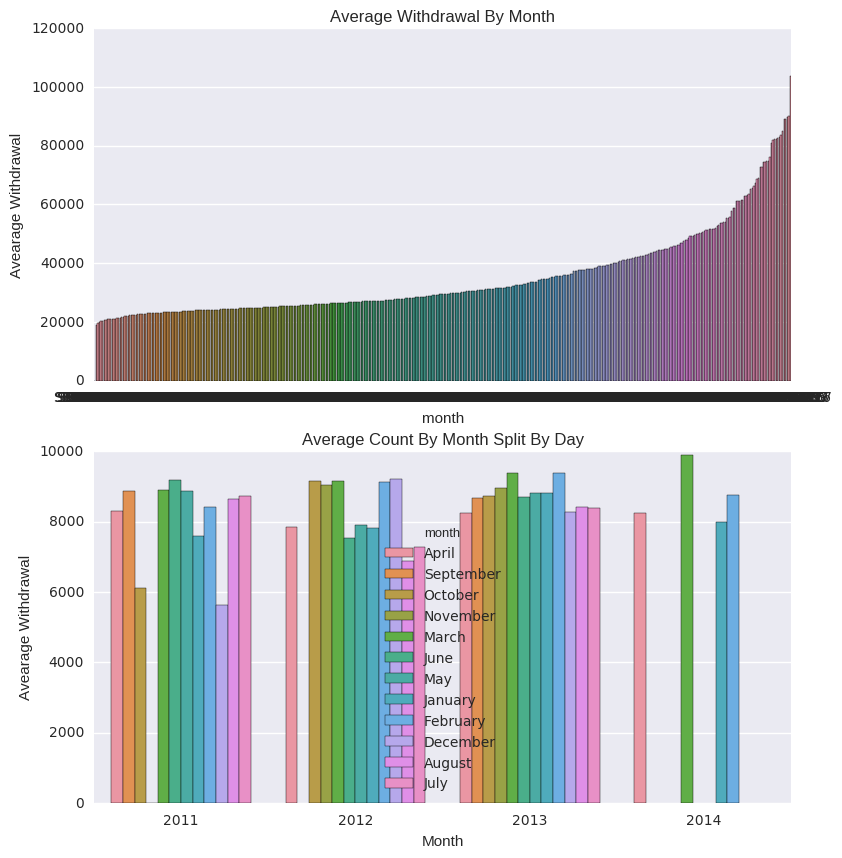

In [1064]:
#df.drop(df.columns[9:13],axis=1,inplace=True)
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(9,10)
monthAggregated = pd.DataFrame(df.groupby("ATM_ID")["Balance"].median()).reset_index()
monthSorted = monthAggregated.sort_values(by="Balance",ascending=True)
sn.barplot(data=monthSorted,x="ATM_ID",y="Balance",ax=ax1)
ax1.set(xlabel='month', ylabel='Avearage Withdrawal',title="Average Withdrawal By Month")
                    
monthWeekDayAggregated = pd.DataFrame(df.groupby(["year","month"],sort=True)["Withdrawal"].median()).reset_index()
monthWeekDaySorted = monthWeekDayAggregated.sort_values(by=["year"],ascending=True)
sn.barplot(data=monthWeekDaySorted,x="year",y="Withdrawal",hue="month",ax=ax2)
ax2.set(xlabel='Month', ylabel='Avearage Withdrawal',title="Average Count By Month Split By Day")

plt.show()


In [1026]:
month_1=[]
month_2=[]
month_3=[]
month_4=[]
month_5=[]
month_6=[]
for month in df.month:
    a=0
    b=0
    c=0
    d=0
    e=0
    f=0
    if month=='November':
        a+=1
    if month=='September':
        b+=1
    if month=='February':
        c+=1
    if (month=='March'):
        d+=1
    if (month=='May' or month=='June'):
        e+=1
    if (month=='August' or month=='December' or month=='July' or month=='January' or month=='April' or month=='October'):
        f+=1
    month_1.append(a)
    month_2.append(b)
    month_3.append(c)
    month_4.append(d)
    month_5.append(e)
    month_6.append(f)

df['month_1']=np.asarray(month_1)
df['month_2']=np.asarray(month_2)
df['month_3']=np.asarray(month_3)
df['month_4']=np.asarray(month_4)
df['month_5']=np.asarray(month_5)
df['month_6']=np.asarray(month_6)
df.head(2)
    

,ID,ATM_ID,Date,Withdrawal,Balance,Facility,med,std,Rural,date,month,year,weekDay,days_1,days_2,days_3,days_4,weekDay_1,weekDay_2,weekDay_3,weekDay_4,weekDay_5,month_1,month_2,month_3,month_4,month_5,month_6
0,SRNO00279_40544,SRNO00279,2011-1-1,4831,68464,1,8933.0,6594.251967,1.0,1,January,2011,Saturday,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,SRNO00279_40545,SRNO00279,2011-1-2,11014,57450,1,8933.0,6594.251967,1.0,2,January,2011,Sunday,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [1066]:
a=df.groupby(['ATM_ID'])['Balance'].median()
b=[]
for x in a:
    b.append(x//3)
h=pd.DataFrame(data=None,columns=['ATM_ID','Replenishment amount'])
h['Replenishment amount']=np.asarray(b)
h['ATM_ID']=df.ATM_ID
    

In [1067]:
h

,ATM_ID,Replenishment amount
0,SRNO00279,9371.0
1,SRNO00279,7005.0
2,SRNO00279,10251.0
3,SRNO00279,8005.0
4,SRNO00279,10383.0
5,SRNO00279,11904.0
6,SRNO00279,8220.0
7,SRNO00279,10895.0
8,SRNO00279,8631.0
9,SRNO00279,10177.0


In [1028]:
df.head(2)
import math
#df['with']=df.Withdrawal.apply(lambda x:math.sqrt(x))

In [1029]:
a=df[(df.month=='September')&(df.year==2012)].index
Index=[]
for index in a:
    Index.append(index)
    
df.drop(df.index[Index],axis=0,inplace=True)
    
        

In [1030]:
df.head(1)

,ID,ATM_ID,Date,Withdrawal,Balance,Facility,med,std,Rural,date,month,year,weekDay,days_1,days_2,days_3,days_4,weekDay_1,weekDay_2,weekDay_3,weekDay_4,weekDay_5,month_1,month_2,month_3,month_4,month_5,month_6
0,SRNO00279_40544,SRNO00279,2011-1-1,4831,68464,1,8933.0,6594.251967,1.0,1,January,2011,Saturday,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [1031]:
train,test=train_test_split(df,test_size=0.1)
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
train.head(1)

,ID,ATM_ID,Date,Withdrawal,Balance,Facility,med,std,Rural,date,month,year,weekDay,days_1,days_2,days_3,days_4,weekDay_1,weekDay_2,weekDay_3,weekDay_4,weekDay_5,month_1,month_2,month_3,month_4,month_5,month_6
0,SRNO88068_41292,SRNO88068,2013-1-18,5005,20011,1,5848.0,4282.978403,1.0,18,January,2013,Friday,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [1048]:
predictors = ['Facility','med','std','Rural','days_1','days_2','days_3','days_4','weekDay_1','weekDay_2','weekDay_3','weekDay_4','weekDay_5','month_1','month_2','month_3','month_4','month_5']
import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.05,
          "max_depth": 4,
          "subsample": 0.75,
          "colsample_bytree": 0.5,
          'gamma':1.0,
          'min_child_weight':5,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 1000

dtrain = xgb.DMatrix(train[predictors], train['Withdrawal'])
dvalid = xgb.DMatrix(test[predictors], test['Withdrawal'])

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds=50)

yhat = gbm.predict(xgb.DMatrix(train[predictors]))
#scores = cross_val_score(gbr, train[predictors], train['Withdrawal'], cv=10)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Will train until eval error hasn't decreased in 50 rounds.
[0]	train-rmse:19032.666016	eval-rmse:18634.484375
[1]	train-rmse:18339.222656	eval-rmse:17942.453125
[2]	train-rmse:17967.240234	eval-rmse:17569.552734
[3]	train-rmse:17375.308594	eval-rmse:16982.148438
[4]	train-rmse:16789.160156	eval-rmse:16398.380859
[5]	train-rmse:16241.654297	eval-rmse:15853.956055
[6]	train-rmse:15733.828125	eval-rmse:15348.809570
[7]	train-rmse:15474.621094	eval-rmse:15088.615234
[8]	train-rmse:15233.326172	eval-rmse:14847.114258
[9]	train-rmse:15018.281250	eval-rmse:14631.208008
[10]	train-rmse:14591.728516	eval-rmse:14208.814453
[11]	train-rmse:14398.924805	eval-rmse:14016.555664
[12]	train-rmse:14007.974609	eval-rmse:13629.796875
[13]	train-rmse:13639.681641	eval-rmse:13265.167969
[14]	train-rmse:13297.266602	eval-rmse:12929.427734
[15]	train-rmse:12980.095703	eval-rmse:12615.546875
[16]	train-rmse:12687.445312	eval-rmse:12327.583984
[17]	train-rmse:12416.637695	eval-rmse:12061.871094
[18]	train-rmse

In [1047]:
predictors

['Facility',
 'med',
 'std',
 'Rural',
 'days_1',
 'days_2',
 'days_3',
 'days_4',
 'weekDay_1',
 'weekDay_2',
 'weekDay_3',
 'weekDay_4',
 'weekDay_5',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5']

In [1040]:
from __future__ import division
def rmse(a,b):
    sqr=0
    diff = a - np.asarray(b)
    for i in range(len(a)):
        sqr+=(diff[i])**2
    print math.sqrt(sqr/len(a))
rmse(train['Withdrawal'],yhat)
    
        

8876.17299877


In [1045]:
df_test=pd.read_csv('~/Downloads/Withdrawal.csv')
print len(df_test)

index_test=[]
c=pd.DataFrame(data=None,columns=['ID','ATM_ID','DATE','WITHDRAWAL'])
for i in range(len(df_test)):
    for j in range(len(id_rem)):
        if df_test.ATM_ID[i]==id_rem[j]:
            result = pd.concat([c,df_test.iloc[i:i+1]],ignore_index=False)
            c=result
            index_test.append(i)
            
df_test.drop(df_test.index[index_test])


#print data.groupby(["ATM_ID"])["Withdrawal"].count()
data_test = pd.merge(df_test,df1,on='ATM_ID')
data_test=pd.merge(data_test,df2,on='ATM_ID')
data_test['Facility']=le.fit_transform(data_test.Facility)

df_test_type = pd.get_dummies(data_test.Type)
df_test_type=df_test_type.iloc[:,1:2]
df_test_new = pd.concat([data_test, df_test_type], axis=1)
df_test_new.drop('Type',axis=1,inplace=True)
df_test_new.head(2)
    
a=[]
for date in df_test_new.DATE:
    d=date.split('-')
    if d[1]=='Jan':
        b='1'
    if d[1]=='Feb':
        b='2'
    if d[1]=='Mar':
        b='3'
    if d[1]=='Apr':
        b='4'
    if d[1]=='May':
        b='5'
    if d[1]=='Jun':
        b='6'
    if d[1]=='Jul':
        b='7'
    if d[1]=='Aug':
        b='8'
    if d[1]=='Sep':
        b='9'
    if d[1]=='Oct':
        b='10'
    if d[1]=='Nov':
        b='11'
    if d[1]=='Dec':
        b='12'
    a.append('20'+d[2]+'-'+b+'-'+d[0])
    
df_test_new['Date'] = np.asarray(a)

df_test_new["date"] = df_test_new.Date.apply(lambda x : x.split('-')[2])
#df_new["month"] = df_new.Date.apply(lambda x : x.split('-')[1])
df_test_new["month"] = df_test_new.Date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
df_test_new["year"] = df_test_new.Date.apply(lambda x : x.split('-')[0])
df_test_new["weekDay"] = df_test_new.Date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
df_test=df_test_new
df_test[['date','year']] = df_test[['date','year']].astype(int)

days_1=[]
days_2=[]
days_3=[]
days_4=[]
for day in df_test.date:
    a=0
    b=0
    c=0
    d=0
    if (day==25 or day==26) or (day>=3 and day<=5):
        a+=1
    if (day>=12 and day<=24):
        b+=1
    if (day>=27 and day<=31) or (day==1 or day==2):
        c+=1
    if (day>=6 and day<=11):
        d+=1
    days_1.append(a)
    days_2.append(b)
    days_3.append(c)
    days_4.append(d)  
df_test['days_1']=np.asarray(days_1)
df_test['days_2']=np.asarray(days_2)
df_test['days_3']=np.asarray(days_3)
df_test['days_4']=np.asarray(days_4)

weekDay_1=[]
weekDay_2=[]
weekDay_3=[]
weekDay_4=[]
weekDay_5=[]
for weekD in df_test.weekDay:
    a=0
    b=0
    c=0
    d=0
    e=0
    if weekD=='Friday':
        a+=1
    if weekD=='Saturday':
        b+=1
    if weekD=='Sunday':
        c+=1
    if (weekD=='Wednesday'or weekD=='Monday'):
        d+=1
    if (weekD=='Tuesday' or weekD=='Thursday'):
        e+=1
    weekDay_1.append(a)
    weekDay_2.append(b)
    weekDay_3.append(c)
    weekDay_4.append(d)
    weekDay_5.append(e)

df_test['weekDay_1']=np.asarray(weekDay_1)
df_test['weekDay_2']=np.asarray(weekDay_2)
df_test['weekDay_3']=np.asarray(weekDay_3)
df_test['weekDay_4']=np.asarray(weekDay_4)
df_test['weekDay_5']=np.asarray(weekDay_5)
month_1=[]
month_2=[]
month_3=[]
month_4=[]
month_5=[]
for month in df_test.month:
    a=0
    b=0
    c=0
    d=0
    e=0
    f=0
    if month=='November':
        a+=1
    if month=='September':
        b+=1
    if month=='February':
        c+=1
    if (month=='March'):
        d+=1
    if (month=='May' or month=='June'):
        e+=1
    if (month=='August' or month=='December' or month=='July' or month=='January' or month=='April' or month=='October'):
        f+=1
    month_1.append(a)
    month_2.append(b)
    month_3.append(c)
    month_4.append(d)
    month_5.append(e)
    month_6.append(f)

df_test['month_1']=np.asarray(month_1)
df_test['month_2']=np.asarray(month_2)
df_test['month_3']=np.asarray(month_3)
df_test['month_4']=np.asarray(month_4)
df_test['month_5']=np.asarray(month_5)
#df_test['month_6']=np.asarray(month_6)

    
df_test.head(2)

14849


,ID,ATM_ID,DATE,WITHDRAWAL,Facility,med,std,Rural,Date,date,month,year,weekDay,days_1,days_2,days_3,days_4,weekDay_1,weekDay_2,weekDay_3,weekDay_4,weekDay_5,month_1,month_2,month_3,month_4,month_5
0,SRNO00279_41760,SRNO00279,01-May-14,NaN,1,8933.0,6594.251967,1.0,2014-5-01,1,May,2014,Thursday,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,SRNO00279_41761,SRNO00279,02-May-14,NaN,1,8933.0,6594.251967,1.0,2014-5-02,2,May,2014,Friday,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [1050]:
pred = gbm.predict(xgb.DMatrix(df_test[predictors]))

In [1051]:
df_test.WITHDRAWAL=np.asarray(pred)
df_test.drop(df_test.columns[4:],axis=1,inplace=True)

In [1052]:
df_test[['WITHDRAWAL']] = df_test[['WITHDRAWAL']].astype(int)
df_test.head(2)

,ID,ATM_ID,DATE,WITHDRAWAL
0,SRNO00279_41760,SRNO00279,01-May-14,15115
1,SRNO00279_41761,SRNO00279,02-May-14,16970


In [1054]:
len(df_test)

13547

In [1055]:
result['WITHDRAWAL']= 0
final = pd.concat([df_test,result],ignore_index=False)
final.to_csv('final_sub.csv')
#final=pd.merge(df_test,result, how='inner', left_index=True, right_index=True)
print len(final)


14849


In [1107]:
rep = pd.read_csv('~/Downloads/Replenishment.csv')
len(rep)

479

In [1108]:
#rep['Replenishment frequency']=3
#rep['Replenishment amount']=25000
#rep.to_csv('rep.csv')
result['Replenishment frequency']=0
result['Replenishment amount']=0
result

,ATM_ID,Replenishment frequency,Replenishment amount
82,SRNO14166,0,0
83,SRNO37673,0,0
84,SRNO59753,0,0
85,SRNO41951,0,0
86,SRNO79538,0,0
87,SRNO82073,0,0
88,SRNO26314,0,0
89,SRNO58337,0,0
90,SRNO93802,0,0
91,SRNO55613,0,0


In [1112]:
index_test=[]
c=pd.DataFrame(data=None,columns=['ATM_ID','Replenishment frequency','Replenishment amount'])
for i in range(len(rep)):
    for j in range(len(id_rem)):
        if rep.ATM_ID[i]==id_rem[j]:
            result = pd.concat([c,rep.iloc[i:i+1]],ignore_index=False)
            c=result
            index_test.append(i)
            
rep=rep.drop(rep.index[index_test])
print len(rep)
pd.merge(rep,h,on='ATM_ID')
a['Replenishment frequency']=3




437


In [1113]:
a

,ATM_ID,Replenishment frequency,Replenishment amount_x,Replenishment amount_y
0,SRNO00279,3,NaN,9371.0
1,SRNO00279,3,NaN,7005.0
2,SRNO00279,3,NaN,10251.0
3,SRNO00279,3,NaN,8005.0
4,SRNO00279,3,NaN,10383.0
5,SRNO00279,3,NaN,11904.0
6,SRNO00279,3,NaN,8220.0
7,SRNO00279,3,NaN,10895.0
8,SRNO00279,3,NaN,8631.0
9,SRNO00279,3,NaN,10177.0


In [1119]:
#result['WITHDRAWAL']= 0
final = pd.concat([a,result],ignore_index=False)
final.to_csv('Replenishment.csv')

In [1117]:
#a=a.drop('Replenishment amount_x',axis=1)
a.rename(columns={'Replenishment amount_y': 'Replenishment amount'}, inplace=True)
len(a)


437

In [1121]:
len(final)

479

In [620]:
train

,ID,ATM_ID,Date,Withdrawal,Balance,Facility,med,std,Rural,days_1,days_2,days_3,days_4,weekDay_1,weekDay_2,weekDay_3,weekDay_4,with
0,SRNO40950_40549,SRNO40950,2011-1-6,5018,19506,1,6590.0,3255.866091,1.0,0,0,0,1,0,0,0,1,70.837843
1,SRNO89711_40655,SRNO89711,2011-4-22,3925,28281,1,6238.5,3947.282990,0.0,0,1,0,0,1,0,0,0,62.649820
2,SRNO99662_40760,SRNO99662,2011-8-5,7475,56313,1,8843.5,5900.790879,1.0,1,0,0,0,1,0,0,0,86.458082
3,SRNO11033_41063,SRNO11033,2012-6-3,15388,17861,1,13945.0,8358.011307,1.0,1,0,0,0,0,0,1,0,124.048378
4,SRNO20699_40781,SRNO20699,2011-8-26,11337,15325,1,7236.5,5654.696101,1.0,1,0,0,0,1,0,0,0,106.475349
5,SRNO97188_41108,SRNO97188,2012-7-18,4061,39128,1,9369.0,5620.177221,1.0,0,1,0,0,0,0,0,1,63.725976
6,SRNO70476_41358,SRNO70476,2013-3-25,30495,77455,1,10787.0,11777.232739,0.0,1,0,0,0,0,0,0,1,174.628176
7,SRNO40622_41576,SRNO40622,2013-10-29,26649,55640,1,21702.0,13234.611328,1.0,0,0,1,0,0,0,0,1,163.245214
8,SRNO46035_40809,SRNO46035,2011-9-23,13657,48267,1,17096.0,9613.732678,1.0,0,1,0,0,1,0,0,0,116.863168
9,SRNO50400_41096,SRNO50400,2012-7-6,3442,20440,1,4658.0,4803.588867,1.0,0,0,0,1,1,0,0,0,58.668561


In [552]:
train,test=train_test_split(df,test_size=0.2)
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
test

,ID,ATM_ID,Date,Withdrawal,Balance,Facility,med,std,Rural,days_1,days_2,days_3,days_4,weekDay_1,weekDay_2,weekDay_3,weekDay_4
0,SRNO56201_40875,SRNO56201,2011-11-28,7632,42409,1,4607.0,7084.717496,0.0,0,0,1,0,0,0,0,1
1,SRNO07634_40937,SRNO07634,2012-1-29,0,15325,1,5071.0,3797.161703,1.0,0,0,1,0,0,0,1,0
2,SRNO21757_41615,SRNO21757,2013-12-7,3603,36280,1,5532.0,4336.000923,1.0,0,0,0,1,0,1,0,0
3,SRNO63919_41190,SRNO63919,2012-10-8,0,30062,1,4921.5,4071.883839,1.0,0,0,0,1,0,0,0,1
4,SRNO06554_41443,SRNO06554,2013-6-18,24606,51554,1,30498.0,15237.220908,0.0,0,1,0,0,0,0,0,1
5,SRNO72652_40859,SRNO72652,2011-11-12,2577,107365,1,17109.0,9363.694997,0.0,0,1,0,0,0,1,0,0
6,SRNO15485_41165,SRNO15485,2012-9-13,56408,71973,1,28103.0,16956.592877,1.0,0,1,0,0,0,0,0,1
7,SRNO09652_41530,SRNO09652,2013-9-13,16313,164051,1,21211.0,17125.569129,0.0,0,1,0,0,1,0,0,0
8,SRNO62345_40855,SRNO62345,2011-11-8,0,9840,1,3597.0,2823.210052,1.0,0,0,0,1,0,0,0,1
9,SRNO23876_41293,SRNO23876,2013-1-19,2384,21312,1,3467.0,3169.556278,1.0,0,1,0,0,0,1,0,0


In [551]:
print predictions[:12]

[ 15719.2   13246.24   7968.76   5220.36   7961.76   9656.88   9706.72
   4292.92   4857.44   4156.2    3040.12   6686.16]


In [284]:
def median(lst):
    return numpy.median(numpy.array(lst))

In [316]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(9,10)
dateAggregated = pd.DataFrame(df.groupby("date")["Withdrawal"].median()).reset_index()
dateSorted = dateAggregated.sort_values(by="date",ascending=True)
sn.barplot(data=dateSorted,x="date",y="Withdrawal",ax=ax1)
ax1.set(xlabel='date', ylabel='Avearage Withdrawal',title="Average Withdrawal By Date")

df.groupby(["month"])["Withdrawal"].std()






month
1     14378.736662
2     14405.936936
3     15257.840575
4     15382.258839
5     15364.399565
6     14367.526614
7     13951.492429
8     13696.530437
9     17389.160618
10    13891.896811
11    14416.273790
12    15444.922046
Name: Withdrawal, dtype: float64

In [432]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18, 20)
sn.boxplot(data=df,y="Withdrawal",orient="v",ax=axes[0][0])
sn.boxplot(data=df,y="Withdrawal",x="Facility",orient="v",ax=axes[0][1])
sn.boxplot(data=df,y="month",x="Withdrawal",orient="h",ax=axes[1][0])
sn.boxplot(data=df,y="weekDay",x="Withdrawal",hue='Rural',orient="h",ax=axes[1][1])
plt.show()

ValueError: Could not interpret input 'Facility'

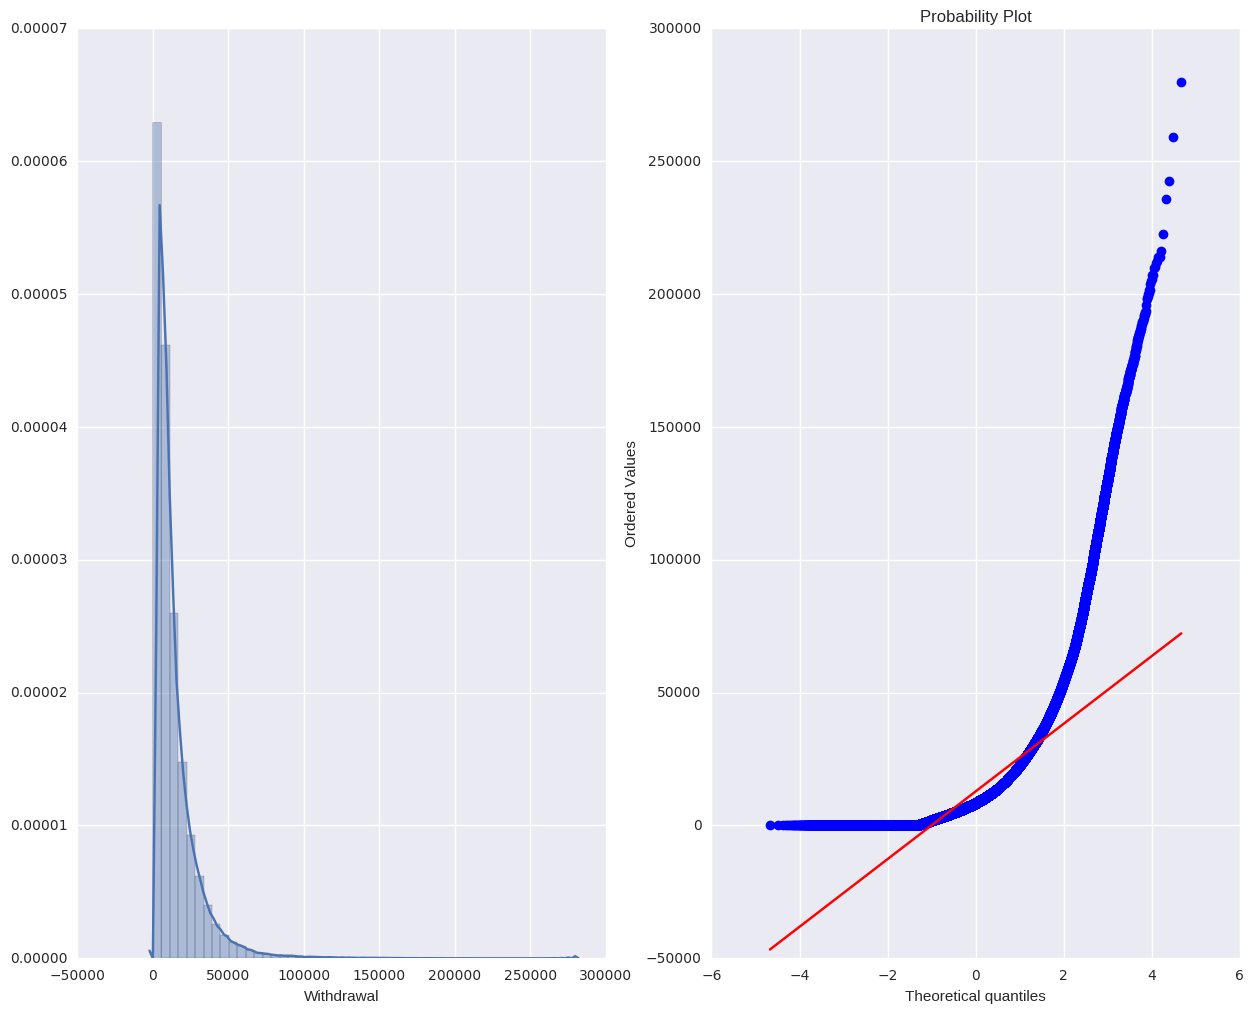

In [534]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(15, 12)
sn.distplot(df["Withdrawal"],ax=ax1)
stats.probplot(df["Withdrawal"], dist='norm', fit=True, plot=ax2)
plt.show()

In [188]:

yearAggregated = pd.DataFrame(df.groupby("year")["Withdrawal"].median()).reset_index()
yearSorted = yearAggregated.sort_values(by="year",ascending=True)
sn.barplot(data=yearSorted,x="year",y="Withdrawal",ax=ax3)
ax3.set(xlabel='year', ylabel='Avearage Withdrawal',title="Average Withdrawal By year")

plt.show()



In [116]:

df[['date']] = df[['date']].astype(float)
monthAggregated.dtypes

date           object
Withdrawal    float64
dtype: object

In [412]:
df_new.columns

Index([u'ID', u'ATM_ID', u'Date', u'Withdrawal', u'Balance', u'Facility',
       u'Type', u'City', u'Rural', u'date', u'month', u'year', u'weekDay',
       u'days_1', u'days_2', u'days_3', u'days_4'],
      dtype='object')

In [1041]:
import xgboost as xgb
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.05,
          "max_depth": 4,
          "subsample": 0.75,
          "colsample_bytree": 0.5,
          'gamma':1.0,
          'min_child_weight':5,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 1000

dtrain = xgb.DMatrix(train[predictors], train['Withdrawal'])
dvalid = xgb.DMatrix(test[predictors], test['Withdrawal'])

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds=50)

yhat = gbm.predict(xgb.DMatrix(train[predictors]))

    
    
    

Will train until eval error hasn't decreased in 50 rounds.
[0]	train-rmse:18740.919922	eval-rmse:18345.041016
[1]	train-rmse:18340.058594	eval-rmse:17942.984375
[2]	train-rmse:17974.761719	eval-rmse:17575.292969
[3]	train-rmse:17371.335938	eval-rmse:16976.929688
[4]	train-rmse:16824.912109	eval-rmse:16434.185547
[5]	train-rmse:16528.808594	eval-rmse:16136.462891
[6]	train-rmse:15997.279297	eval-rmse:15607.390625
[7]	train-rmse:15506.990234	eval-rmse:15121.974609
[8]	train-rmse:15052.262695	eval-rmse:14671.605469
[9]	train-rmse:14614.466797	eval-rmse:14235.815430
[10]	train-rmse:14210.578125	eval-rmse:13837.330078
[11]	train-rmse:13835.791016	eval-rmse:13466.906250
[12]	train-rmse:13510.069336	eval-rmse:13146.586914
[13]	train-rmse:13179.564453	eval-rmse:12820.225586
[14]	train-rmse:13020.879883	eval-rmse:12662.014648
[15]	train-rmse:12746.828125	eval-rmse:12393.233398
[16]	train-rmse:12474.535156	eval-rmse:12125.870117
[17]	train-rmse:12226.119141	eval-rmse:11881.923828
[18]	train-rmse

In [831]:
train.iloc[:10]

,ID,ATM_ID,Date,Withdrawal,Balance,Facility,med,std,Rural,days_1,days_2,days_3,weekDay_1,weekDay_2,weekDay_3
0,SRNO44287_41086,SRNO44287,2012-6-26,29159,3,1,19835.5,11043.502750,1.0,1,0,0,0,0,0
1,SRNO43630_41493,SRNO43630,2013-8-7,24975,85526,1,45526.0,37349.771365,0.0,0,0,0,0,0,0
2,SRNO22153_41611,SRNO22153,2013-12-3,8494,36798,1,5896.0,4947.449040,1.0,1,0,0,0,0,0
3,SRNO91543_41096,SRNO91543,2012-7-6,17842,26055,1,15429.0,10010.053946,1.0,0,0,0,1,0,0
4,SRNO94588_41655,SRNO94588,2014-1-16,6789,36485,1,5589.0,3593.162952,1.0,0,1,0,0,0,0
5,SRNO57193_41434,SRNO57193,2013-6-9,8052,17797,1,6931.0,4118.646865,1.0,0,0,0,0,0,1
6,SRNO81623_41089,SRNO81623,2012-6-29,12113,33713,1,3729.5,3460.988443,0.0,0,0,1,1,0,0
7,SRNO48908_41561,SRNO48908,2013-10-14,2671,18476,1,1839.5,2491.510987,1.0,0,1,0,0,0,0
8,SRNO01212_41227,SRNO01212,2012-11-14,4860,10711,1,2771.0,3948.477048,1.0,0,1,0,0,0,0
9,SRNO78074_41235,SRNO78074,2012-11-22,4917,23162,1,4370.0,3982.482392,1.0,0,1,0,0,0,0
